## **Import Library and Packages**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### **This is 1000 Movies Dataset based on IMDB of 2006 to 2015**

This Dataset is about 1000 movies Dataset based on IMDB in last 10 Years.

| **Column Name**    | **Description of Each Column**                   |
| -------------      | :---------------------------                     |
| Rank               | Movie Rank order |
| Title              | title of the film   |
| Genre              |A comma-separated list of genres used to classify the  film   |
| Description        | Brief one-sentence movie summary  |
| Director           |The name of the film's director                 |
| Actors             |A comma-separated list of the main stars of the film         |
| Year               | The year that the film released as an integer |
| Runtime (Minutes)  | The duration of the film in minutes. |
| Rating             |User rating for the movie 0-10  |
| Votes              | Number of votes |
| Revenue (Millions) | Movie revenue in millions      |   
| Metascore          | An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews. |  

## **Loading Dataset**

In [123]:
mvs_df = pd.read_csv("https://raw.githubusercontent.com/gauravbatra14/Term-1/master/Data/Projects/1000%20movies%20data.csv")

mvs_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [124]:
mvs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


#### As we found that for which years, Data has been picked up.

In [125]:
mvs_df['Year'].unique()

array([2014, 2012, 2016, 2015, 2007, 2011, 2008, 2006, 2009, 2010, 2013])

In [126]:
mvs_df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

After uploading the data, 128 Columns are blank in revenue and 64 columns are blank in Metascore as Metascore is Critics Score and highest ratings will be Positive scores.

In [0]:
mvs_df.rename(columns = {'Runtime (Minutes)' : 'Runtime_mins', 'Revenue (Millions)' : 'Revenue_Millions'}, inplace = True)

## **Average Revenue in Millions**

In [128]:
mvs_df['Revenue_Millions'].mean()

82.95637614678897

#### As we have taken mean in both columns for removing null values.

In [0]:
mvs_df['Revenue_Millions'].fillna(mvs_df['Revenue_Millions'].mean(), inplace = True)

In [0]:
mvs_df['Metascore'].fillna(mvs_df['Metascore'].mean(), inplace = True)

In [131]:
mvs_df.isnull().sum()

Rank                0
Title               0
Genre               0
Description         0
Director            0
Actors              0
Year                0
Runtime_mins        0
Rating              0
Votes               0
Revenue_Millions    0
Metascore           0
dtype: int64

### **Data Visualizations and EDA on Dataset**

In [132]:
movie_subset = mvs_df.loc['Prometheus':'Sing']

movie_subset = mvs_df.iloc[1:4]

movie_subset

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_mins,Rating,Votes,Revenue_Millions,Metascore
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [133]:
mvs_df[(mvs_df['Genre'] == 'Thriller') | (mvs_df['Director'] == 'M. Night Shyamalan')]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_mins,Rating,Votes,Revenue_Millions,Metascore
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.000000
282,283,Death Proof,Thriller,Two separate sets of voluptuous women are stal...,Quentin Tarantino,"Kurt Russell, Zoë Bell, Rosario Dawson, Vaness...",2007,113,7.1,220236,82.956376,58.985043
289,290,Iris,Thriller,"Iris, young wife of a businessman, disappears ...",Jalil Lespert,"Romain Duris, Charlotte Le Bon, Jalil Lespert,...",2016,99,6.1,726,82.956376,58.985043
318,319,The Visit,"Comedy,Horror,Thriller",Two siblings become increasingly frightened by...,M. Night Shyamalan,"Olivia DeJonge, Ed Oxenbould, Deanna Dunagan, ...",2015,94,6.2,81429,65.070000,55.000000
444,445,The Thinning,Thriller,"""The Thinning"" takes place in a post-apocalypt...",Michael J. Gallagher,"Logan Paul, Peyton List, Lia Marie Johnson,Cal...",2016,81,6.0,4531,82.956376,31.000000
512,513,The Happening,"Sci-Fi,Thriller","A science teacher, his wife, and a young girl ...",M. Night Shyamalan,"Mark Wahlberg, Zooey Deschanel, John Leguizamo...",2008,91,5.0,170897,64.510000,34.000000
581,582,The Last Airbender,"Action,Adventure,Family","Follows the adventures of Aang, a young succes...",M. Night Shyamalan,"Noah Ringer, Nicola Peltz, Jackson Rathbone,De...",2010,103,4.2,125129,82.956376,20.000000
729,730,The Guest,Thriller,A soldier introduces himself to the Peterson f...,Adam Wingard,"Dan Stevens, Sheila Kelley, Maika Monroe, Joel...",2014,100,6.7,71069,0.320000,76.000000
746,747,Only for One Night,Thriller,A married womans husband with a perfect life c...,Chris Stokes,"Brian White, Karrueche Tran, Angelique Pereira...",2016,86,4.6,313,82.956376,60.000000
773,774,Lady in the Water,"Drama,Fantasy,Mystery",Apartment building superintendent Cleveland He...,M. Night Shyamalan,"Paul Giamatti, Bryce Dallas Howard, Jeffrey Wr...",2006,110,5.6,82701,42.270000,36.000000


In [134]:
mvs_df[(mvs_df['Year'] == 2015) & (mvs_df['Revenue_Millions'] >= 100.0)].head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_mins,Rating,Votes,Revenue_Millions,Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
63,64,Fifty Shades of Grey,"Drama,Romance,Thriller",Literature student Anastasia Steele's life cha...,Sam Taylor-Johnson,"Dakota Johnson, Jamie Dornan, Jennifer Ehle,El...",2015,125,4.1,244474,166.15,46.0
67,68,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",A woman rebels against a tyrannical ruler in p...,George Miller,"Tom Hardy, Charlize Theron, Nicholas Hoult, Zo...",2015,120,8.1,632842,153.63,90.0
84,85,Furious Seven,"Action,Crime,Thriller",Deckard Shaw seeks revenge against Dominic Tor...,James Wan,"Vin Diesel, Paul Walker, Dwayne Johnson, Jason...",2015,137,7.2,301249,350.03,67.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
94,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
102,103,The Martian,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
129,130,The Revenant,"Adventure,Drama,Thriller",A frontiersman on a fur trading expedition in ...,Alejandro González Iñárritu,"Leonardo DiCaprio, Tom Hardy, Will Poulter, Do...",2015,156,8.0,499424,183.64,76.0
169,170,Spectre,"Action,Adventure,Thriller",A cryptic message from Bond's past sends him o...,Sam Mendes,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",2015,148,6.8,308981,200.07,60.0
179,180,Ant-Man,"Action,Adventure,Comedy",Armed with a super-suit with the astonishing a...,Peyton Reed,"Paul Rudd, Michael Douglas, Corey Stoll, Evang...",2015,117,7.3,368912,180.19,64.0


### **Top 10 Movies as per their Revenue(In Millions)**

In [135]:
mvs_df.groupby(['Title'])['Revenue_Millions'].sum().sort_values(ascending = False)[:10]

Title
Star Wars: Episode VII - The Force Awakens    936.63
Avatar                                        760.51
Jurassic World                                652.18
The Avengers                                  623.28
The Dark Knight                               533.32
Rogue One                                     532.17
Finding Dory                                  486.29
Avengers: Age of Ultron                       458.99
The Dark Knight Rises                         448.13
The Hunger Games: Catching Fire               424.65
Name: Revenue_Millions, dtype: float64

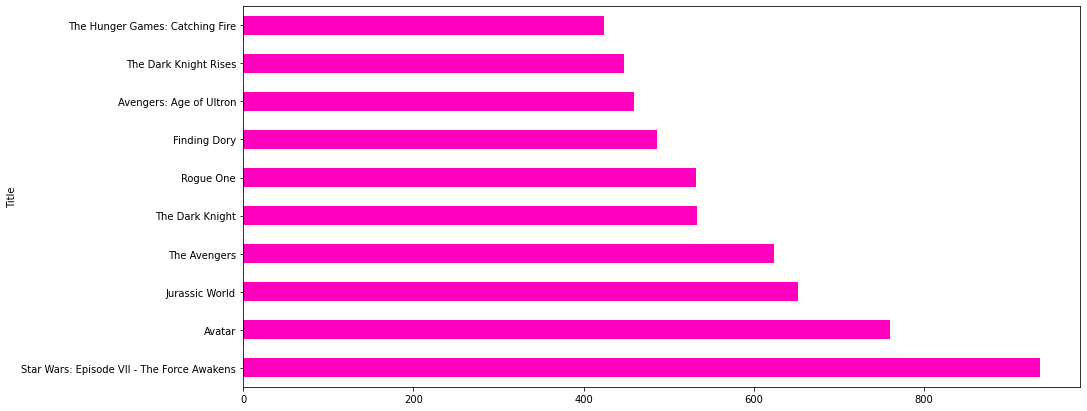

In [136]:
mvs_df.groupby(['Title'])['Revenue_Millions'].mean().sort_values(ascending = False)[:10].plot(kind= 'barh', figsize = (15,7), cmap = 'gist_rainbow_r')

#### Star Wrs: Episode VII has earned maximum revenue as 937 Millions and there is good amount of difference in Between Ist & 2nd Movie which is of 176 Millions and if we will take last 10 movies then All these 10 movies only generated 0.13 Millions put together.

### **Last 10 movies in terms of Revenue**

In [150]:
mvs_df.groupby(['Title'])['Revenue_Millions'].mean().sort_values(ascending = True)[:10]

Title
A Kind of Murder            0.00
Dead Awake                  0.01
Lovesong                    0.01
Wakefield                   0.01
Love, Rosie                 0.01
Into the Forest             0.01
Stake Land                  0.02
The First Time              0.02
The Blackcoat's Daughter    0.02
The Sea of Trees            0.02
Name: Revenue_Millions, dtype: float64

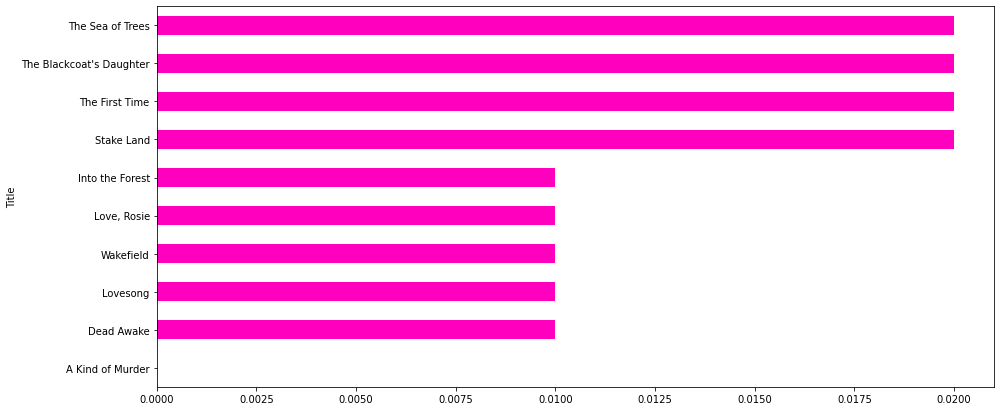

In [146]:
mvs_df.groupby(['Title'])['Revenue_Millions'].mean().sort_values(ascending = True)[:10].plot(kind= 'barh', figsize = (15,7), cmap = 'gist_rainbow_r')

### **Top 10 Movies as per their Votes**

#### From Votes point of view, The Dark Knight and Inception is on top 2 places and Avater which is 2nd place in terms of revenue, its on 9th place in terms of Votings.

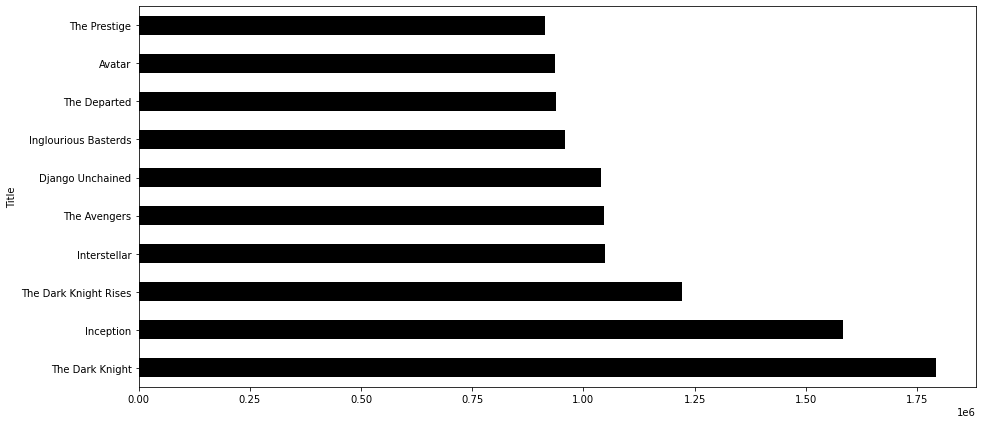

In [137]:
mvs_df.groupby(['Title'])['Votes'].mean().sort_values(ascending = False)[:10].plot(kind= 'barh', figsize = (15,7), cmap = 'CMRmap')

### **Top 10 Movies as per Ratings**

#### From ratings poll, Star wars and Avatar both are not there in top 10 movies. The Dark Knight and Inception are on top 2 places in ratings as well.

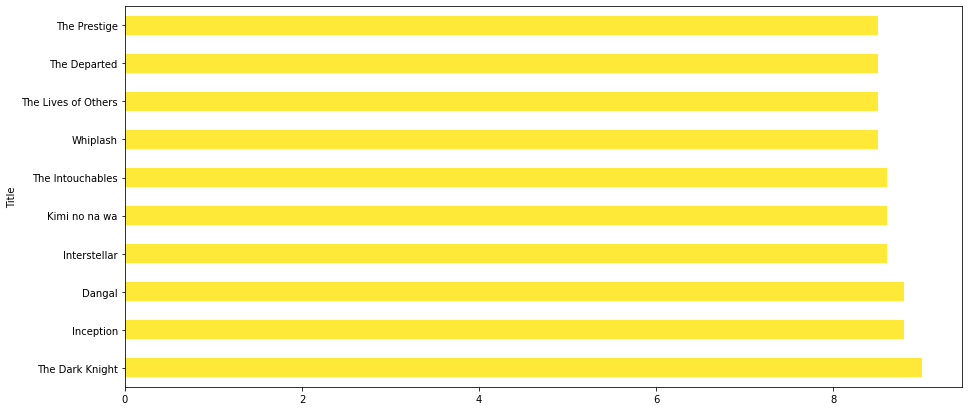

In [138]:
mvs_df.groupby(['Title'])['Rating'].mean().sort_values(ascending = False)[:10].plot(kind= 'barh', figsize = (15,7), cmap = 'cividis_r')

### **Top 10 Movies as per their Running Time**

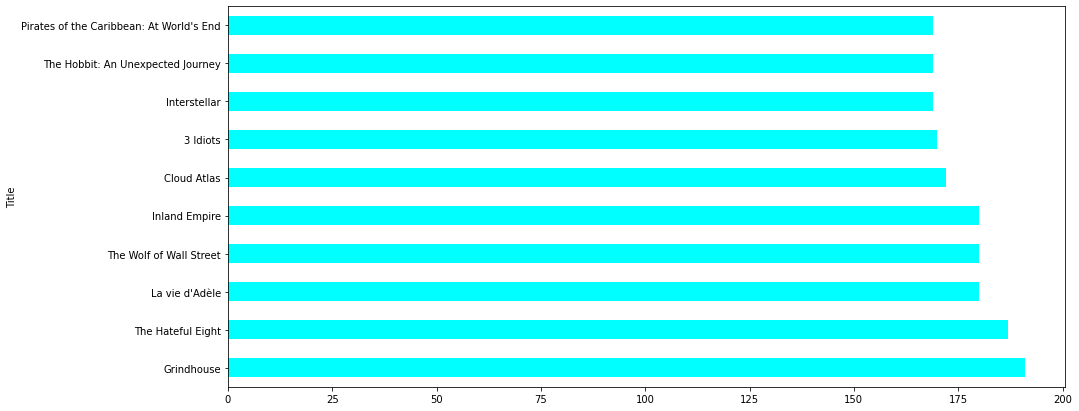

In [139]:
mvs_df.groupby(['Title'])['Runtime_mins'].mean().sort_values(ascending = False)[:10].plot(kind= 'barh', figsize = (15,7), cmap = 'cool')

### **Adding new Column as "Rating Category"**

#### As we have added one more column as Rating category in which if rating is above than 8 then it considered as good otherwise bad.

In [0]:
def rating_function(x):
  if x >= 8.0:
    return 'good'
  else:
    return 'bad'

In [152]:
mvs_df['rating_category'] = mvs_df['Rating'].apply(rating_function)
mvs_df.sort_values(by = 'Revenue_Millions', ascending = False).head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_mins,Rating,Votes,Revenue_Millions,Metascore,rating_category
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,good
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0,bad
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0,bad
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0,good
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,good


### **Boxplot of Rating Categories and Revenue(In Millions)**

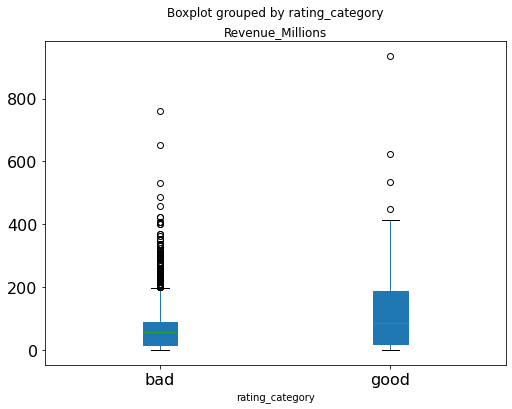

In [143]:
mvs_df.boxplot(by="rating_category", column="Revenue_Millions", figsize=(8,6), grid=False, fontsize=16, patch_artist=True)

#### In boxplot representation, there are 3-4 movies which are having higher revenues and ratings are above 8 as considered as good movies. Star wars-VII are considered as good movie where 2nd & 3rd highest revenue movies were considered as bad because their Ratings are below 8.0.

### **Scatterplot of Ratings Vs. Revenue(In Millions)**

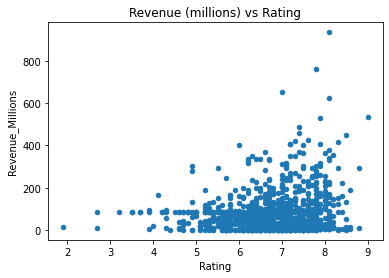

In [142]:
mvs_df.plot.scatter(x='Rating', y='Revenue_Millions', title='Revenue (millions) vs Rating');

### **Correlation between Columns**

In [144]:
mvs_df.corr()

,Rank,Year,Runtime_mins,Rating,Votes,Revenue_Millions,Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.185159
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.076077
Runtime_mins,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.202239
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.604723
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.318116
Revenue_Millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.132304
Metascore,-0.185159,-0.076077,0.202239,0.604723,0.318116,0.132304,1.000000


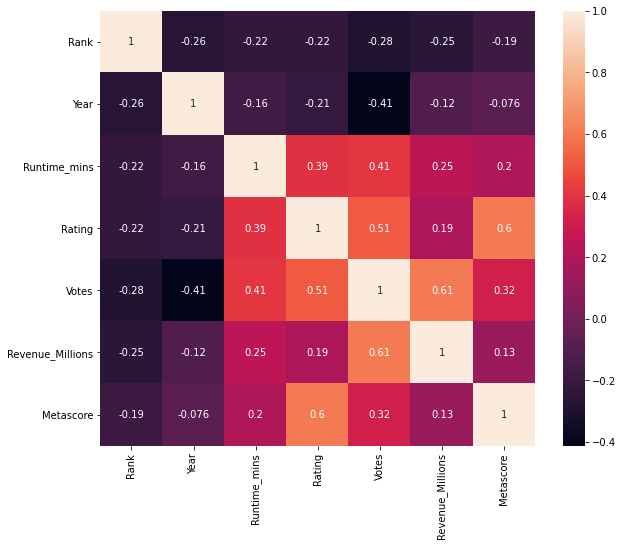

In [145]:
f, ax = plt.subplots(figsize=(10, 8))
corr = mvs_df.corr()
sns.heatmap(corr, square=True, ax=ax, annot= True)

Here's Co-relation representation of Heat Map, in which its clearly represented as Votes and Ratings are having good Co-relation and same is for Metascore and Ratings as well. There is good co-relation in between Votes and Revenue but there are some outliers in this as having higher revenues but less votes.

### **Top 10 movies based on Metascores**

#### Its representing completely different scenario for top 10 movies in comparison to Ratings and Votes and same is shown in Co-relation map as well where Metascore is hardly any relation with revenue(in millions).

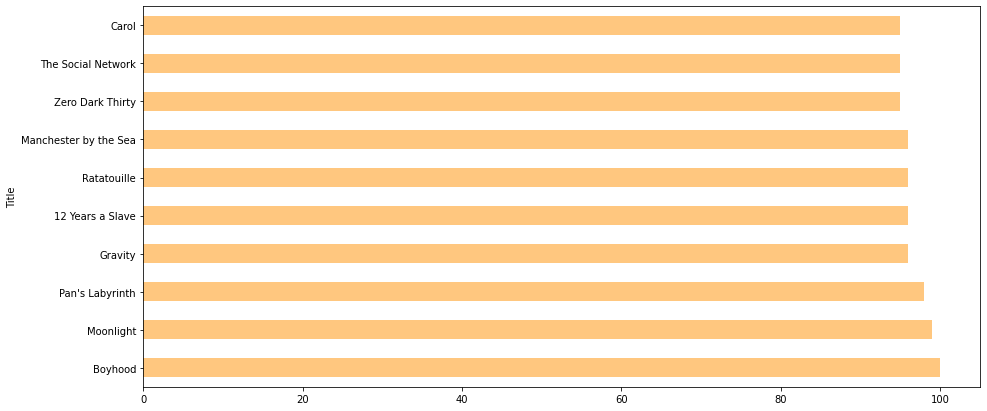

In [156]:
mvs_df.groupby(['Title'])['Metascore'].mean().sort_values(ascending = False)[:10].plot(kind= 'barh', figsize = (15,7), cmap = 'copper_r')